In [655]:
#importing the libraries here
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd

%matplotlib inline


In [656]:
#the first step is loading the data and pre-processing
#Lets load the data into pandas dataframe
data = pd.read_csv("Breast_cancer_data.csv") 
data['diagnosis_flag'] = np.where(data['diagnosis']=='M', 1, 0)

train_data=data.sample(frac=0.8,random_state=200)
test_data=data.drop(train_data.index)

test = train_data['diagnosis_flag']
test_numpy = test.values
Y_train= (test_numpy.reshape((-1,1)))

test = test_data['diagnosis_flag']
test_numpy = test.values
Y_test= (test_numpy.reshape((-1,1)))

train = train_data[data.columns.difference(['diagnosis', 'Unnamed: 32','diagnosis_flag'])]
#Then we will do pre-processing where we will subtract the mean and divide by the 
#max-min
train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


#Convert the train_norm to a numpy matrix
X_train=train_norm.values

train = test_data[data.columns.difference(['diagnosis', 'Unnamed: 32','diagnosis_flag'])]
#Then we will do pre-processing where we will subtract the mean and divide by the 
#max-min
train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


#Convert the train_norm to a numpy matrix
X_test=train_norm.values

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(455, 31)
(114, 31)
(455, 1)
(114, 1)


In [657]:
#Next we will create the sigmoid function
def sigmoid (z):
    return np.exp(z)*1.00/(1+np.exp(z))

In [658]:
#Next we will initialize the W and b values based on the number of features in the
#training dataset
#first calculate the number of features, which is equal to the number of columns in train_norm
num_features = X_train.shape[1]
W = np.zeros((num_features,1))
b = 0



In [659]:
#Next we will create the forward propogation function which will take the W and b
#values for creating the prediction
def forward_prop(W,b,X):
    return sigmoid(np.matmul(X, W)+b)

#print (forward_prop(W,b,train_norm_numpy))

In [660]:
#Next we will create the function to calculate the loss for a given prediction value
#This is the log-likelihood function where we sum the log of predictions if its 1 or
#log of (1- prediction) if its 0 and take a -ve of all that. Thus our goal is to minimize
#this loss function
def loss(W,b,X,Y):
    m = X.shape[0]
    A=forward_prop(W,b,X)
    return -1.00/m*np.sum((np.multiply(Y, np.log(A))+np.multiply((1-Y), np.log(1-A))))

print (loss(W,b,X_train,Y_train))

0.69314718056


In [661]:
#Next we will calculate the gradient values for the W and b for one full iteration of gradient
#descent
def gradient (Y,X,prediction):
    m = X.shape[0]
    db = 1.00/m*(np.sum(prediction - Y))
    #print (np.transpose(X))
    dw = 1.00/m*(np.dot(np.transpose(X),prediction - Y))
    return db,dw


In [662]:
learning_rate = 0.5
number_of_steps = 10
for i in range (number_of_steps):
    A = forward_prop(W,b,X_train)
    db,dw = gradient(Y_train,X_train,A)
    W = W - learning_rate* dw
    b = b - learning_rate* db
    print (loss(W,b,X_train,Y_train))
    

0.658424546892
0.627914923524
0.600919822577
0.576869437887
0.555301296921
0.535840221497
0.51818100296
0.50207411508
0.48731425533
0.473731299143


In [663]:
def predict(X_train,Y_train,X_test,Y_test,learning_rate,number_of_steps):
    num_features = X_train.shape[1]
    W = np.zeros((num_features,1))
    b = 0
    test_accuracy = []
    iterations = []
    for i in range(number_of_steps):
        A = forward_prop(W,b,X_train)
        db,dw = gradient(Y_train,X_train,A)
        W = W - learning_rate* dw
        b = b - learning_rate* db
        #print (loss(W,b,X_train,Y_train))
        A_test = forward_prop(W,b,X_test)
        Y_prediction_test =  np.where(A_test > 0.5, 1, 0)
        #print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
        test_accuracy.append(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100)
        iterations.append(i)
        
        A_train = forward_prop(W,b,X_train)
        Y_prediction_train =  np.where(A_train > 0.5, 1, 0)
        #print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    #print (test_accuracy)
    test_accuracy = np.squeeze(test_accuracy)
    plt.plot(test_accuracy)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(iterations))
    plt.show()
    plt.plot(test_accuracy)
    

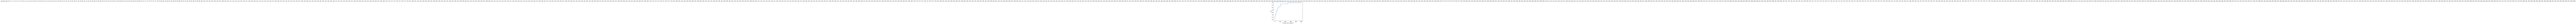

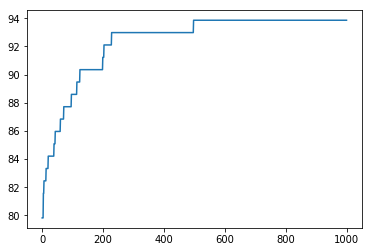

In [664]:

predict(X_train,Y_train,X_test,Y_test,0.1,1000)

In [665]:
print (W)
print (b)

[[ 0.20868234]
 [ 0.08867812]
 [ 0.2056497 ]
 [ 0.19431604]
 [ 0.09157665]
 [ 0.18450731]
 [ 0.29958886]
 [ 0.08942475]
 [ 0.36183253]
 [ 0.25761747]
 [ 0.03345268]
 [ 0.2223033 ]
 [-0.00903745]
 [ 0.0092224 ]
 [ 0.07912931]
 [ 0.01208544]
 [ 0.24980051]
 [ 0.1182581 ]
 [ 0.2617152 ]
 [ 0.24954386]
 [ 0.12364241]
 [ 0.26789858]
 [ 0.11153714]
 [-0.01311952]
 [ 0.14725995]
 [ 0.09230075]
 [-0.00446936]
 [ 0.10791907]
 [ 0.13001694]
 [-0.00298474]
 [ 0.16187188]]
-0.417900587719
